### A notebook for running and visualizing results from
# Ad Vacuum
### - Ad Vacuum: a Mesh Analysis Software for Non Steady State Diffusion 

#### available at Zenodo
#### DOI: XYZ

By Björn Stenqvist, Div. of Physical Chemistry, Lund University, Sweden
 
The following Python packages are needed to run the notebook:<br> numpy<br> matplotlib

In [1]:
%matplotlib inline
import numpy as np, os
import matplotlib, matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl

fontSizeLabel=10
fontSizeLegend=8
fontSizeAll=8
plt.rcParams.update({'font.size': fontSizeAll, 'figure.figsize': [3.513475, 2.713475],'xtick.labelsize':fontSizeAll,'ytick.labelsize':fontSizeAll})
rc('font',**{'family':'serif','sans-serif':['Times']}) # set font
rc('text', usetex=True) # use tex
color_c='black' # color for reference
color_mu='black' # color for this work
insetColor='black' # color of lines in insets
cmaps = 'plasma'
R=8.31446261815324 # gas constant
T=298.15 # temperature
RT=R*T
mum=1e-6 # micrometer

def findValue(filename,key):
    with open (filename, "r") as hfile:
      sp = hfile.read()

    lines = sp.split("\n")
    for line in lines:
        words = line.split(" ")
        if words[0] == key:
            return words[1]
        
def getDimensions(filename):
    height = float(findValue(filename,'height'))
    width = float(findValue(filename,'width'))
    return height, width

## Generate input

In [2]:
%%writefile input.txt
model_nbr     0     # model number, 0 gives Brick and Mortar
d             5.0   # width of bricks
s             0.1   # horizontal spacing between bricks
g             0.1   # vertical spacing between bricks
t             1.0   # brick thickness
N             5     # nbr of layers of bricks
omega         1.0   # offset ratio, negative gives random
c_out         1.0   # concentration on one side of system (zero on the other)
S_out         1.0   # solubility outside system
S_mv          1.0   # mortar solubility (verticle)
S_mh          1.0   # mortar solubility (horizontal)
S_bv          0.7   # brick solubility (verticle)
S_bh          0.7   # brick solubility (horizontal)
D_mv          1.0   # mortar diffusion coefficient (verticle)
D_mh          1.0   # mortar diffusion coefficient (horizontal)
D_bv          1.0   # brick diffusion coefficient (verticle)
D_bh          1.0   # brick diffusion coefficient (horizontal)
seed          1     # seed, negative gives random
Nc            51    # number of columns of nodes in mesh
Nr            54    # number of rows of nodes in mesh
time_steps    100000   # number of time-steps
sample        10000    # sample interval
dt            1e-4     # time-step
time_periodic -1    # time between updating boundary condition
evaporate     false # if true, evaporate volume at upper boundary
evap_time     50    # evaporation-time
evap_left     0.5   # volume-fraction left after evaporation time
output_folder Output # folder for output

Overwriting input.txt


## Run software

In [3]:
! ../../advacuum input.txt

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Visualize results

### Concentration

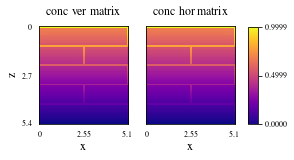

In [4]:
def plotConcentrations():
    height, width = getDimensions('output.txt')
    fig, ((ax1),(ax2)) = plt.subplots(nrows=1, ncols=2)

    conc_ver = np.loadtxt('Output/conc_10.txt')
    M,N = np.shape(conc_ver)
    im = ax1.matshow(conc_ver,cmap=cmaps)
    ax1.set_xticks([0,N/2,N-1])
    ax1.set_xticklabels(['0',str(width/2),str(width)])
    ax1.xaxis.set_ticks_position('bottom')
    ax1.set_yticks([0,M/2,M-1])
    ax1.set_yticklabels(['0',str(height/2),str(height)])
    ax1.tick_params(right=False,left=False,top=False,bottom=False)
    ax1.set_title('conc ver matrix', fontsize=12)
    ax1.set_xlabel('x', fontsize=12)
    ax1.set_ylabel('z', fontsize=12)

    conc_hor = np.loadtxt('Output/conc_10.txt')
    M,N = np.shape(conc_hor)
    im2 = ax2.matshow(conc_hor,cmap=cmaps)
    ax2.set_xticks([0,N/2,N-1])
    ax2.set_xticklabels(['0',str(width/2),str(width)])
    ax2.xaxis.set_ticks_position('bottom')
    ax2.set_yticklabels({})
    ax2.tick_params(right=False,left=False,top=False,bottom=False)
    ax2.set_title('conc hor matrix', fontsize=12)
    ax2.set_xlabel('x', fontsize=12)

    maxV = np.max([np.max(conc_ver),np.max(conc_hor)])
    minV = np.min([np.min(conc_ver),np.min(conc_hor)])
    if minV < 0:
        print('Warning! Negative concentration')
    minV = 0
    cbticks = [minV,0.5*(minV+maxV),maxV]
    cblabels = [str(minV),str(0.5*(minV+maxV)),str(maxV)]
    cb_ax = fig.add_axes([0.95, 0.25, 0.04, 0.5])
    cbar = mpl.colorbar.ColorbarBase(cb_ax, ticks=cbticks, boundaries=np.linspace(minV,maxV,1000), cmap=cmaps,norm=mpl.colors.Normalize(vmin=minV, vmax=maxV))
    #cbar.ax.set_yticklabels(cblabels, fontsize=12)
    plt.savefig('concentrations.pdf',dpi=300,bbox_inches='tight')
plotConcentrations()

### Flux

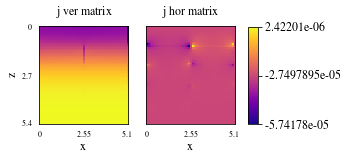

In [5]:
def plotFlux():
    height, width = getDimensions('output.txt')
    fig, ((ax1),(ax2)) = plt.subplots(nrows=1, ncols=2)

    j_ver = np.loadtxt('Output/j_ver_1.txt')
    M,N = np.shape(j_ver)
    im = ax1.matshow(j_ver,cmap=cmaps)
    ax1.set_xticks([0,N/2,N-1])
    ax1.set_xticklabels(['0',str(width/2),str(width)])
    ax1.xaxis.set_ticks_position('bottom')
    ax1.set_yticks([0,M/2,M-1])
    ax1.set_yticklabels(['0',str(height/2),str(height)])
    ax1.tick_params(right=False,left=False,top=False,bottom=False)
    ax1.set_title('j ver matrix', fontsize=12)
    ax1.set_xlabel('x', fontsize=12)
    ax1.set_ylabel('z', fontsize=12)

    j_hor = np.loadtxt('Output/j_hor_1.txt')
    M,N = np.shape(j_hor)
    im2 = ax2.matshow(j_hor,cmap=cmaps)
    ax2.set_xticks([0,N/2,N-1])
    ax2.set_xticklabels(['0',str(width/2),str(width)])
    ax2.xaxis.set_ticks_position('bottom')
    ax2.set_yticklabels({})
    ax2.tick_params(right=False,left=False,top=False,bottom=False)
    ax2.set_title('j hor matrix', fontsize=12)
    ax2.set_xlabel('x', fontsize=12)

    maxV = np.max([np.max(j_ver),np.max(j_hor)])
    minV = np.min([np.min(j_ver),np.min(j_hor)])
    cbticks = [minV,0.5*(minV+maxV),maxV]
    cblabels = [str(minV),str(0.5*(minV+maxV)),str(maxV)]
    cb_ax = fig.add_axes([0.95, 0.25, 0.04, 0.5])
    cbar = mpl.colorbar.ColorbarBase(cb_ax, ticks=cbticks, boundaries=np.linspace(minV,maxV,1000), cmap=cmaps,norm=mpl.colors.Normalize(vmin=minV, vmax=maxV))
    cbar.ax.set_yticklabels(cblabels, fontsize=12)
    plt.savefig('flux_matrix.pdf',dpi=300,bbox_inches='tight')
plotFlux()

### Absolute activity

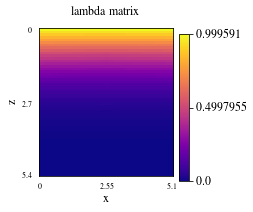

In [9]:
def plotAbsoluteActivity():
    height, width = getDimensions('output.txt')
    fig, (ax1) = plt.subplots(nrows=1, ncols=1)

    absactivity = np.loadtxt('Output/lambda_1.txt')
    M,N = np.shape(absactivity)
    im = ax1.matshow(absactivity,cmap=cmaps)
    ax1.set_xticks([0,N/2,N-1])
    ax1.set_xticklabels(['0',str(width/2),str(width)])
    ax1.xaxis.set_ticks_position('bottom')
    ax1.set_yticks([0,M/2,M-1])
    ax1.set_yticklabels(['0',str(height/2),str(height)])
    ax1.tick_params(right=False,left=False,top=False,bottom=False)
    ax1.set_title('lambda matrix', fontsize=12)
    ax1.set_xlabel('x', fontsize=12)
    ax1.set_ylabel('z', fontsize=12)

    maxV = np.max(absactivity)
    minV = np.min(absactivity)
    cbticks = [minV,0.5*(minV+maxV),maxV]
    cblabels = [str(minV),str(0.5*(minV+maxV)),str(maxV)]
    cb_ax = fig.add_axes([0.8, 0.1, 0.04, 0.75])
    cbar = mpl.colorbar.ColorbarBase(cb_ax, ticks=cbticks, boundaries=np.linspace(minV,maxV,1000), cmap=cmaps,norm=mpl.colors.Normalize(vmin=minV, vmax=maxV))
    cbar.ax.set_yticklabels(cblabels, fontsize=12)
    plt.savefig('absolute_activity.pdf',dpi=300,bbox_inches='tight')
plotAbsoluteActivity()

### Diffussion coefficient

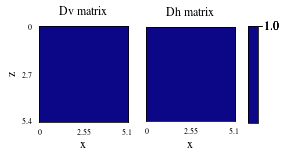

In [7]:
def plotDiffusionCoefficients():
    height, width = getDimensions('output.txt')
    fig, ((ax1),(ax2)) = plt.subplots(nrows=1, ncols=2)

    diffcoeff_ver = np.loadtxt('Output/Dv_matrix.txt')
    M,N = np.shape(diffcoeff_ver)
    im = ax1.matshow(diffcoeff_ver,cmap=cmaps)
    ax1.set_xticks([0,N/2,N-1])
    ax1.set_xticklabels(['0',str(width/2),str(width)])
    ax1.xaxis.set_ticks_position('bottom')
    ax1.set_yticks([0,M/2,M-1])
    ax1.set_yticklabels(['0',str(height/2),str(height)])
    ax1.tick_params(right=False,left=False,top=False,bottom=False)
    ax1.set_title('Dv matrix', fontsize=12)
    ax1.set_xlabel('x', fontsize=12)
    ax1.set_ylabel('z', fontsize=12)

    diffcoeff_hor = np.loadtxt('Output/Dh_matrix.txt')
    M,N = np.shape(diffcoeff_hor)
    im2 = ax2.matshow(diffcoeff_hor,cmap=cmaps)
    ax2.set_xticks([0,N/2,N-1])
    ax2.set_xticklabels(['0',str(width/2),str(width)])
    ax2.xaxis.set_ticks_position('bottom')
    ax2.set_yticklabels({})
    ax2.tick_params(right=False,left=False,top=False,bottom=False)
    ax2.set_title('Dh matrix', fontsize=12)
    ax2.set_xlabel('x', fontsize=12)

    maxV = np.max([np.max(diffcoeff_ver),np.max(diffcoeff_hor)])
    minV = np.min([np.min(diffcoeff_ver),np.min(diffcoeff_hor)])
    if minV < 0:
        print('Warning! Negative diffusion coefficients')
    cbticks = [minV,0.5*(minV+maxV),maxV]
    cblabels = [str(minV),str(0.5*(minV+maxV)),str(maxV)]
    cb_ax = fig.add_axes([0.95, 0.25, 0.04, 0.5])
    cbar = mpl.colorbar.ColorbarBase(cb_ax, ticks=cbticks, boundaries=np.linspace(minV,maxV,1000), cmap=cmaps,norm=mpl.colors.Normalize(vmin=minV, vmax=maxV))
    cbar.ax.set_yticklabels(cblabels, fontsize=12)
    plt.savefig('diffusion_coefficients.pdf',dpi=300,bbox_inches='tight')
plotDiffusionCoefficients()

### Solubility

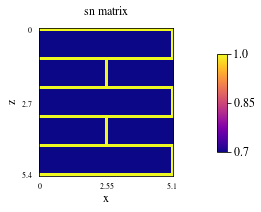

In [8]:
def plotSolubility():
    height, width = getDimensions('output.txt')
    fig, ax1 = plt.subplots(nrows=1, ncols=1)

    s_nodes = np.loadtxt('Output/sn_matrix.txt')
    M,N = np.shape(s_nodes)
    im = ax1.matshow(s_nodes,cmap=cmaps)
    ax1.set_xticks([0,N/2,N-1])
    ax1.set_xticklabels(['0',str(width/2),str(width)])
    ax1.xaxis.set_ticks_position('bottom')
    ax1.set_yticks([0,M/2,M-1])
    ax1.set_yticklabels(['0',str(height/2),str(height)])
    ax1.tick_params(right=False,left=False,top=False,bottom=False)
    ax1.set_title('sn matrix', fontsize=12)
    ax1.set_xlabel('x', fontsize=12)
    ax1.set_ylabel('z', fontsize=12)

    maxV = np.max(s_nodes)
    minV = np.min(s_nodes)
    cbticks = [minV,0.5*(minV+maxV),maxV]
    cblabels = [str(minV),str(0.5*(minV+maxV)),str(maxV)]
    cb_ax = fig.add_axes([0.95, 0.25, 0.04, 0.5])
    cbar = mpl.colorbar.ColorbarBase(cb_ax, ticks=cbticks, boundaries=np.linspace(minV,maxV,1000), cmap=cmaps,norm=mpl.colors.Normalize(vmin=minV, vmax=maxV))
    cbar.ax.set_yticklabels(cblabels, fontsize=12)
    plt.savefig('solubility.pdf',dpi=300,bbox_inches='tight')
plotSolubility()